# we have to accurately predict insurance charges  ...

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

In [2]:
def read_data():
    data=pd.read_csv("C:\Regression Exercise\Regression Assignments\insurance.csv")
    return data
data = read_data()

In [3]:
data.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [5]:
print(data.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [6]:
print(data.sex.unique())

['female' 'male']


In [7]:
print(data.region.unique())

['southwest' 'southeast' 'northwest' 'northeast']


In [8]:
print(data.region.value_counts())

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


In [9]:
print(data.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [10]:
print(data.duplicated().sum())

1


In [11]:
data.drop_duplicates(inplace=True)

In [12]:
print(data.duplicated().sum())

0


In [13]:
lb = LabelEncoder()

In [14]:
data['sex'] = lb.fit_transform(data['sex'])

In [15]:
data['smoker'] = lb.fit_transform(data['smoker'])

In [16]:
data['region'] = lb.fit_transform(data['region'])

In [17]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [18]:
data.corr()['charges']

age         0.298308
sex         0.058044
bmi         0.198401
children    0.067389
smoker      0.787234
region     -0.006547
charges     1.000000
Name: charges, dtype: float64

<Axes: xlabel='charges', ylabel='smoker'>

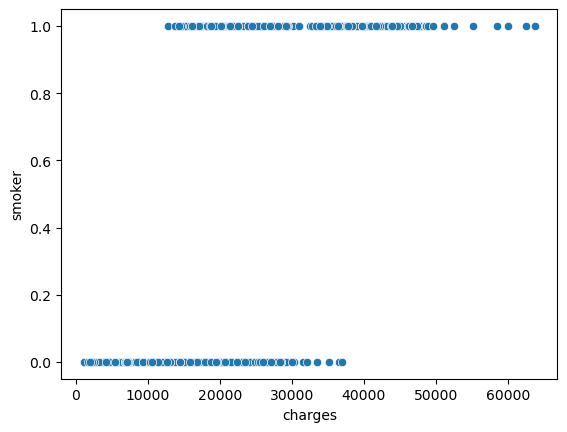

In [19]:
sns.scatterplot(data,x='charges',y='smoker')

<Axes: >

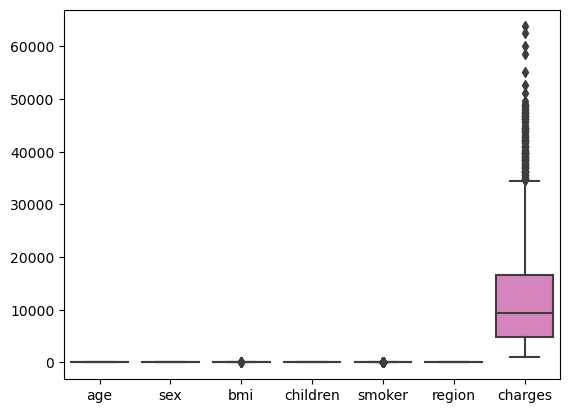

In [20]:
sns.boxplot(data)

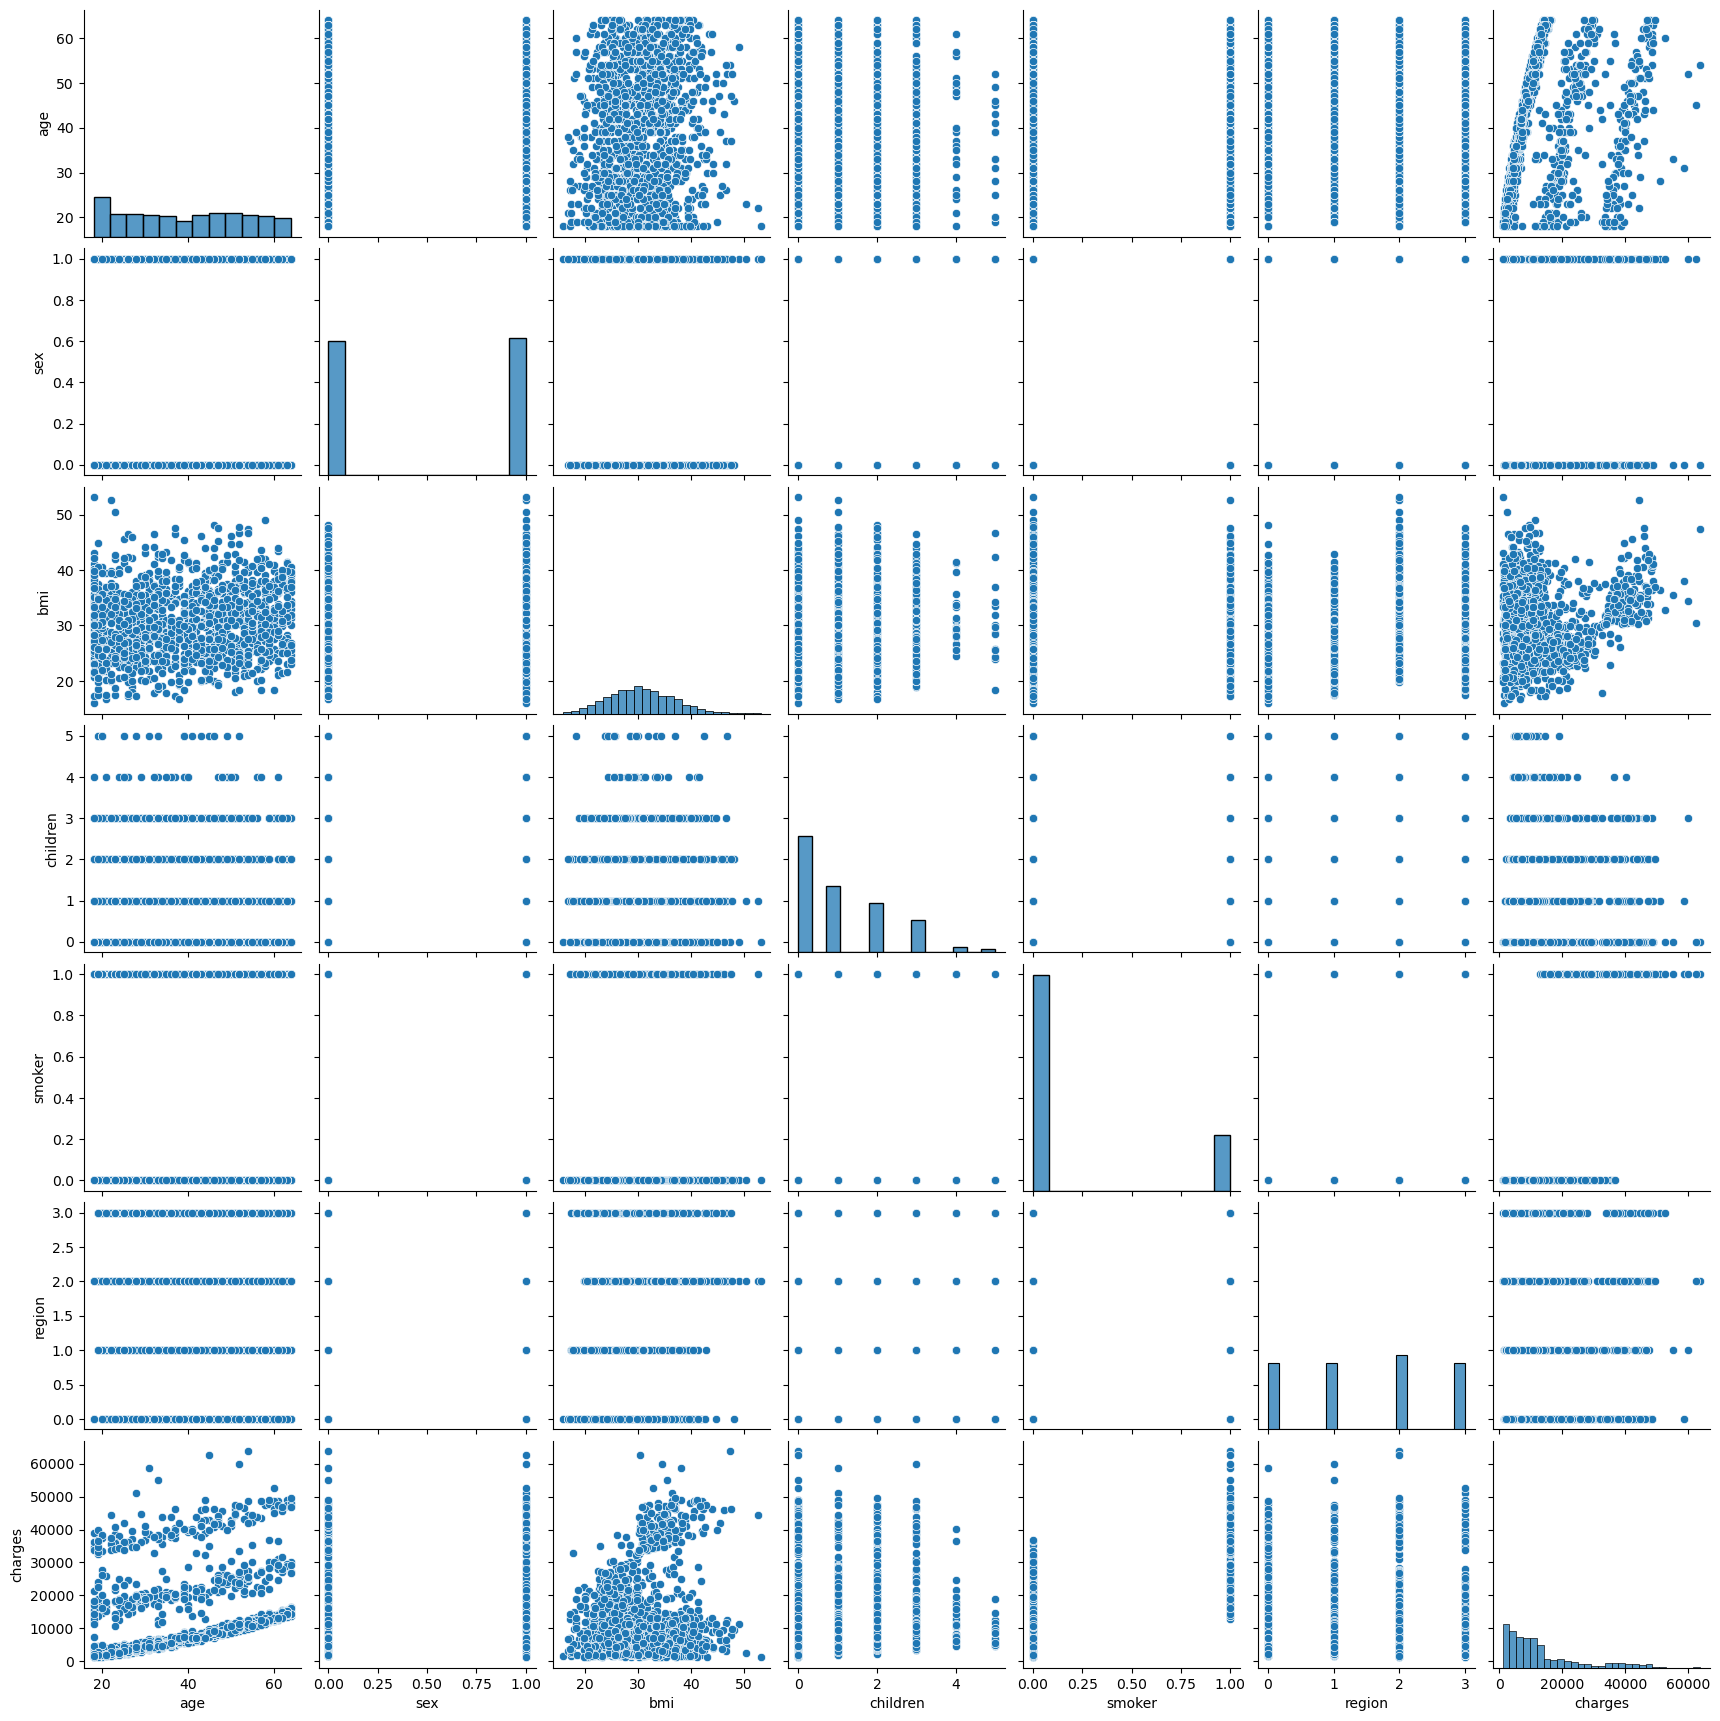

In [21]:
sns.pairplot(data)

<Axes: >

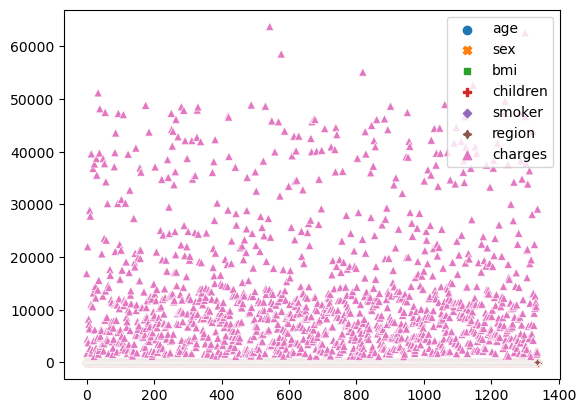

In [22]:
sns.scatterplot(data)

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'smoker'}>,
        <Axes: title={'center': 'region'}>],
       [<Axes: title={'center': 'charges'}>, <Axes: >, <Axes: >]],
      dtype=object)

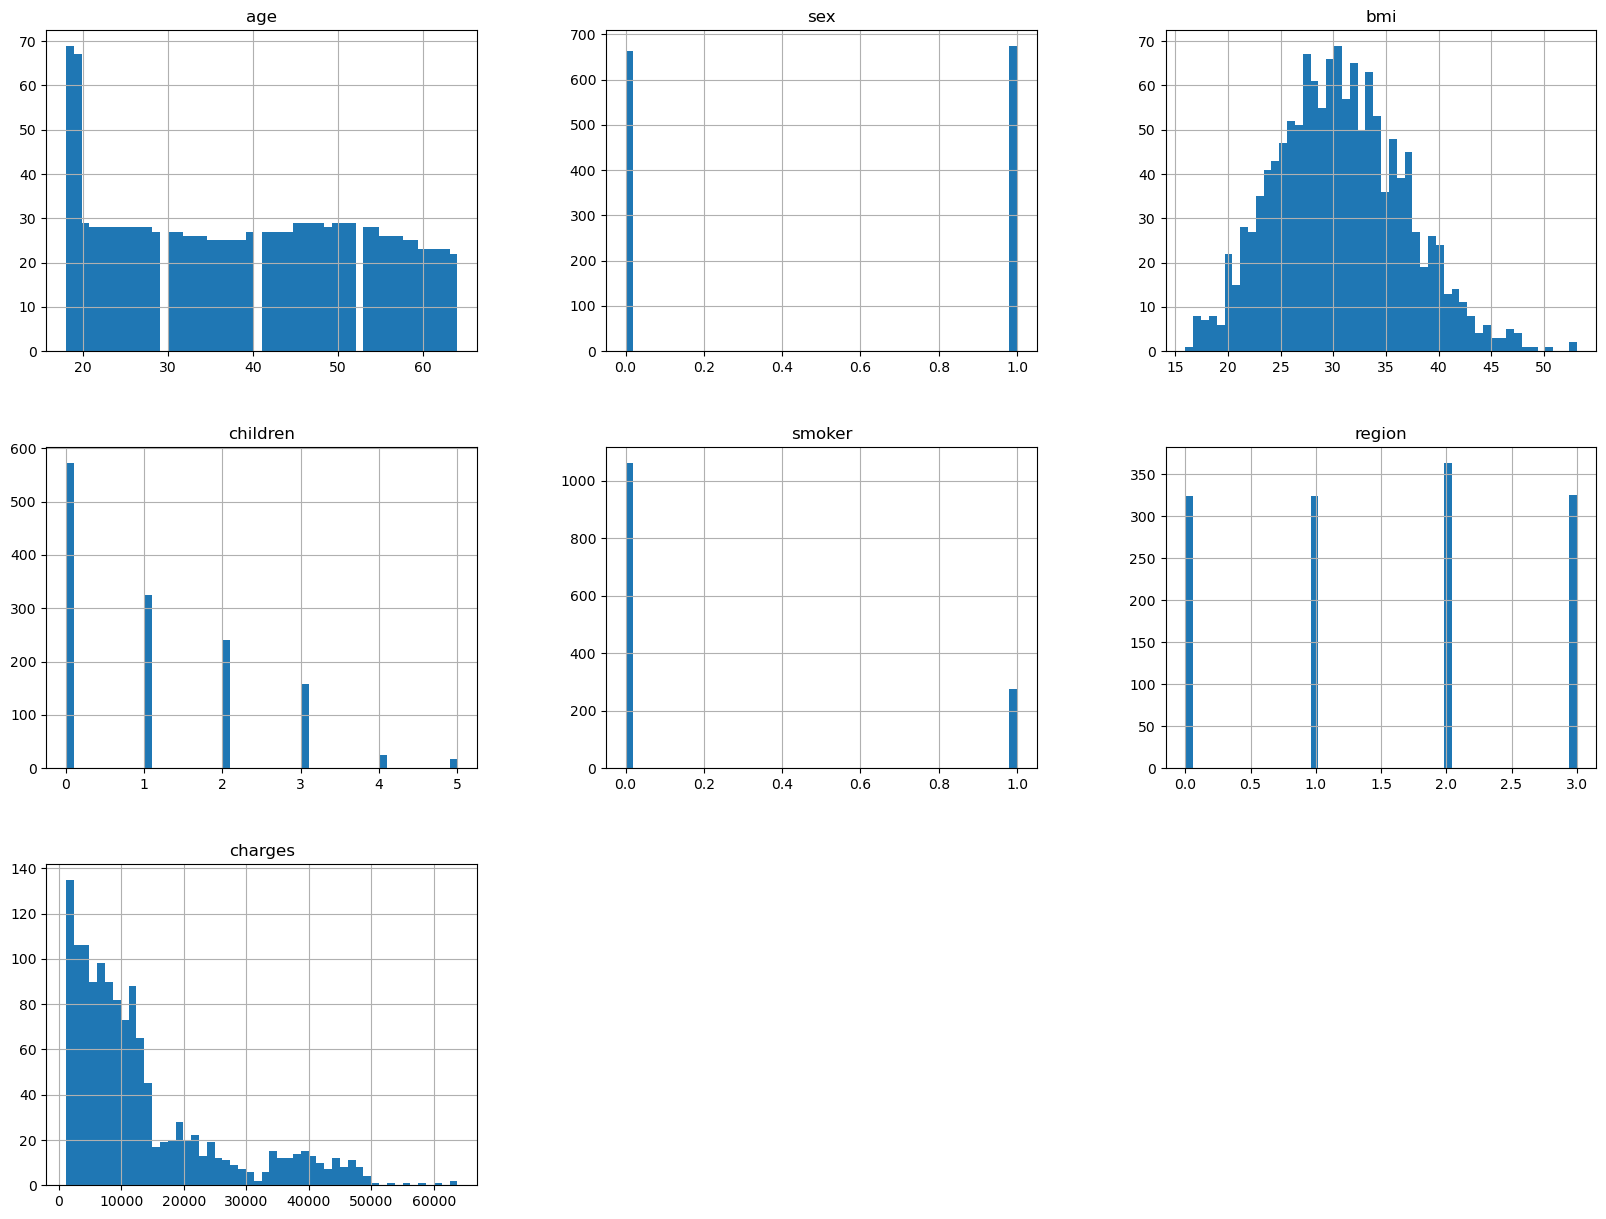

In [23]:
data.hist(bins=50,figsize=(20,15))

In [24]:
## We have to scale down the value because the charges column values arevery high compare to others columns

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
sc = StandardScaler()

In [27]:
#data = sc.fit_transform(data)

In [28]:
x = data[['smoker','age']]    ## We are taking only these columns because this are valuable for our predction

In [29]:
y = data['charges']

In [32]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=123)

In [33]:
model = LinearRegression()

In [34]:
model.fit(x_train,y_train)

LinearRegression()

In [35]:
pred = model.predict(x_test)

In [36]:
pred

array([ 4089.09881699, 12586.30818095, 28004.88851423,  3540.89176125,
       12312.20465308,  6556.03056782,  9297.06584651, 10941.68701373,
        7378.34115142, 32390.54496014,  4911.4094006 , 11763.99759734,
        4911.4094006 , 13134.51523668, 10941.68701373, 26360.26734702,
       13956.82582029, 26086.16381915, 31020.0273208 ,  6556.03056782,
       37872.61551753, 15053.23993177,  2992.68470551,  7926.54820716,
       26634.37087489, 11489.89406947, 13408.61876455, 10393.47995799,
        2992.68470551, 38694.92610114,  2718.58117764, 10941.68701373,
       13682.72229242,  5459.61645634,  8200.65173503, 11489.89406947,
       35131.58023884,  5185.51292847, 37872.61551753, 26360.26734702,
        6556.03056782,  8200.65173503, 27456.68145849, 13134.51523668,
        4363.20234486, 33486.95907162, 11763.99759734, 27456.68145849,
        6281.92703995, 12586.30818095, 14230.92934816, 28553.09556997,
       32938.75201588,  9297.06584651, 12586.30818095, 12586.30818095,
      

In [45]:
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error

In [51]:
result = (r2_score(y_test,pred))

In [52]:
print("Accuracy of the model is ",result)

Accuracy of the model is  0.7670968696811821


In [46]:
mean_squared_error(y_test,pred)

35998499.750614055